# Schematics

In [1]:
%matplotlib inline

# load common things
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# big figures/
mpl.rcParams['savefig.dpi'] = 2 * mpl.rcParams['savefig.dpi']

coloram = [1,0.5,0];
colorbot = [0.12,0.47,0.71];

## Force balance time-series

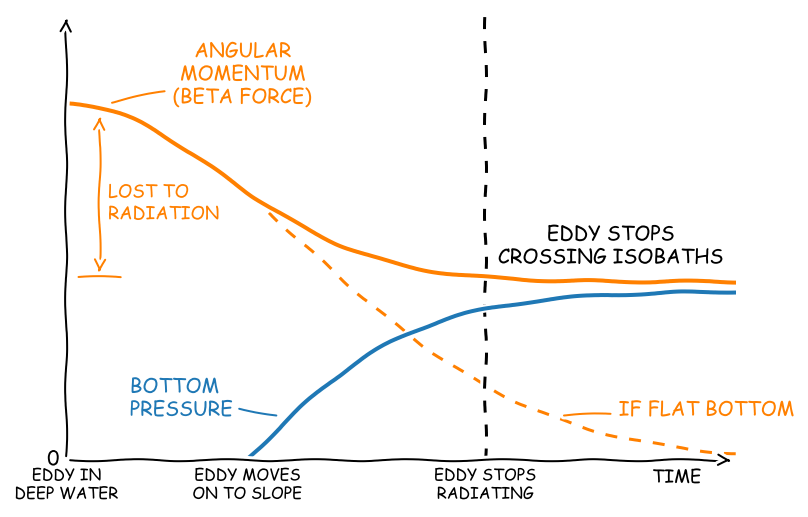

In [4]:
t = np.linspace(0,4,100)
am = 2 + 2 * np.exp(-(t/1.3)**2)
amflat = 4 * np.exp(-(t/2)**2)
t0 = 1.08;
pbot = 1.9 * np.tanh(t-t0)

with plt.xkcd():
    plt.figure()
    plt.hold(True)
    plt.plot(t, am, color=coloram)
    plt.plot(t[30:], amflat[30:],  color=coloram, 
             linestyle='--', linewidth=1.5, zorder=1)
    plt.plot(t, pbot, color=colorbot)
    plt.ylim([0,5])

    # label axes
    ax = plt.gca()
    xtickloc = 2.5
    plt.xticks([0, t0, xtickloc])
    plt.yticks([0])
    plt.axvline(xtickloc, color='k', 
                linestyle='--', linewidth=1.5, zorder=1)
    ax.xaxis.set_tick_params(top='off', bottom='off')
    ax.yaxis.set_tick_params(left='off', right='off')
    ax.xaxis.set_ticklabels(['EDDY IN\nDEEP WATER', 
                             'EDDY MOVES\nON TO SLOPE',
                             'EDDY STOPS\nRADIATING'], size=8)

    # mark difference
    #plt.axhline(4, color='k', linestyle='--')
    plt.annotate('', xy=[0.2,am.max()-0.1], 
                    xytext=[0.2,am.min()+0.05],
                     arrowprops=dict(arrowstyle='<->', color=coloram))
    plt.annotate('', xy=[0.05,am.min()+0.05], 
                    xytext=[0.35,am.min()+0.05],
                     arrowprops=dict(arrowstyle='-', color=coloram))

    plt.text(0.25, 2.7, 'LOST TO\nRADIATION', size=9, color=coloram)

    # Easiest to draw axes as arrows using plt.annotate()
    plt.box(None)
    xlim = plt.xlim();
    ylim = plt.ylim();
    plt.annotate('', xy=[xlim[1],ylim[0]], xytext=[0,0],
                arrowprops=dict(arrowstyle='->'))
    plt.annotate('', xy=[xlim[0],ylim[1]], xytext=[0,0],
                arrowprops=dict(arrowstyle='->'))

    # fake x-axis label
    dx=0.5; dy=0.25;
    loc = [xlim[1]-dx, ylim[0]-dy];
    plt.text(loc[0], loc[1], 'TIME', size=9)

    # label lines
    plt.annotate('ANGULAR\nMOMENTUM\n(BETA FORCE)', xy=[0.25,4], xytext=[1.05,4],
                arrowprops=dict(arrowstyle='-', color=coloram), 
                 size=10, ha='center', color=coloram)
    plt.annotate('BOTTOM\nPRESSURE', xy=[t0+0.2,0.50], xytext=[0.3+(t0-1),0.5],
                arrowprops=dict(arrowstyle='-',color=colorbot), 
                 size=10, color=colorbot)
    plt.annotate('IF FLAT BOTTOM', xy=[2.95,0.50], xytext=[3.3,0.5],
                arrowprops=dict(arrowstyle='-', color=coloram), 
                 size=10, color=coloram)
    plt.text(3.25,2.15, 'EDDY STOPS\nCROSSING ISOBATHS', 
             fontsize=10, va='bottom', ha='center')
    
plt.savefig('images/force-timeseries-schematic.png', bbox_inches='tight')

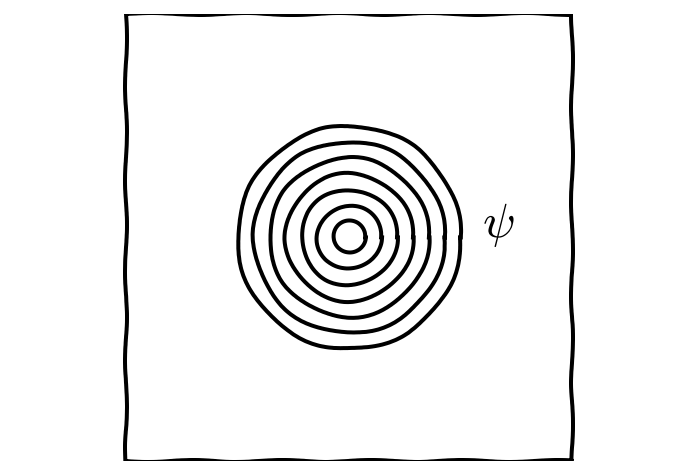

In [67]:
with plt.xkcd():
    plt.plot([-1,1,1,-1,-1],[-1,-1,1,1,-1], color='k')
    plt.box(None)
    plt.hold(True)
    ax = plt.gca(); hfig = plt.gcf();
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    th = np.linspace(0,2*np.pi,100)
    for r in np.linspace(0,0.5,8):
        plt.plot(r*np.cos(th), r*np.sin(th), color='k')
                        
    plt.text(0.6,0, r'$\psi$', fontsize=24)
    plt.axis('equal')

plt.savefig('images/integrate-schematic.png', bbox_inches='tight')

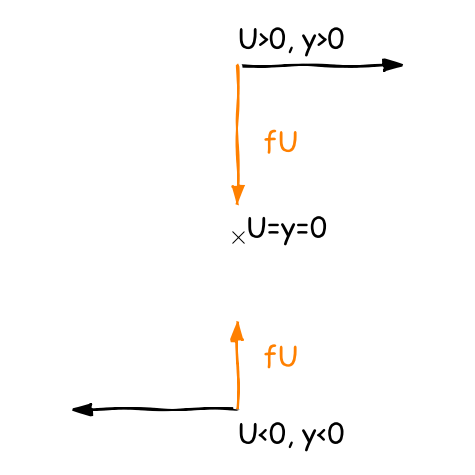

In [68]:
th = np.linspace(0,2*np.pi,100)
r = 1
with plt.xkcd():
    #plt.plot(r*np.cos(th), r*np.sin(th), color='k')
    ax = plt.gca()
    plt.hold(True)
    plt.axis('image')
    plt.plot(0,0,'kx')
    plt.xlim([-1.3,1.3])
    plt.ylim([-1.3,1.3])
    # mark velocity
    plt.arrow(0,1,0.85,0, head_width=0.07, color='black')
    plt.arrow(0,-1,-0.85,0, head_width=0.07, color='black')
    plt.text(0,1.1,'U>0, y>0')
    plt.text(0.05,0,'U=y=0')
    plt.text(0,-1.2,'U<0, y<0')
    # mark coriolis forces
    colorcor = coloram
    plt.arrow(0,1,0,-0.7, color=colorcor, head_width=0.07)
    plt.arrow(0,-1,0,0.4, color=colorcor, head_width=0.07)
    plt.text(0.15,0.5, 'fU', color=colorcor)
    plt.text(0.15,-0.75, 'fU', color=colorcor)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.box(None)
    
plt.savefig('images/byuforce.png', bbox_inches='tight')

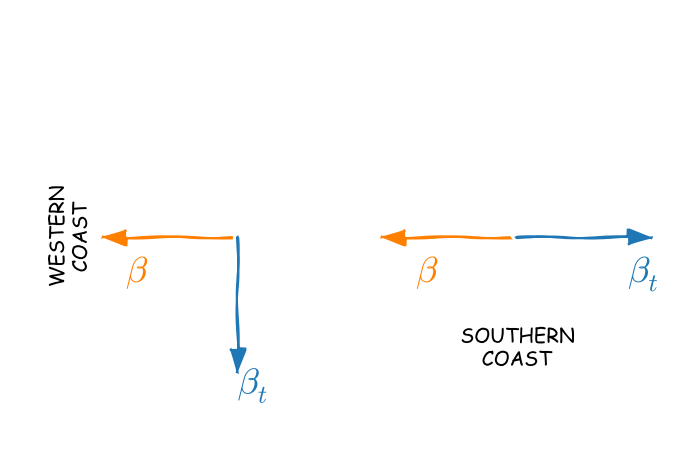

In [178]:
with plt.xkcd():
    ax = plt.gca()
    # southern coast
    plt.arrow(0.75,0,-0.5,0, head_width=0.07, color=coloram) # β
    plt.arrow(0.75,0,0.5,0, head_width=0.07, color=colorbot) # β_t
    plt.text(0.3,-0.2, r'$\beta$', fontsize=18, color=coloram)
    plt.text(1.25,-0.2, r'$\beta_t$', fontsize=18, color=colorbot)
    
    # western coast
    plt.arrow(-0.5,0,-0.5,0, head_width=0.07, color=coloram) # β
    plt.arrow(-0.5,0,0,-0.5, head_width=0.07, color=colorbot) # β_t
    plt.text(-1.0,-0.2, r'$\beta$', fontsize=18, color=coloram)
    plt.text(-0.5,-0.7, r'$\beta_t$', fontsize=18, color=colorbot)
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.,1])
    
    # name coasts
    plt.text(0.75,-0.5, 'SOUTHERN\nCOAST', 
             fontsize=10, va='center', ha='center')
    plt.text(-1.25,0, 'WESTERN\nCOAST', 
             rotation=90, fontsize=10,va='center', ha='center')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.box(None)
    
plt.savefig('images/betas.png', bbox_inches='tight');

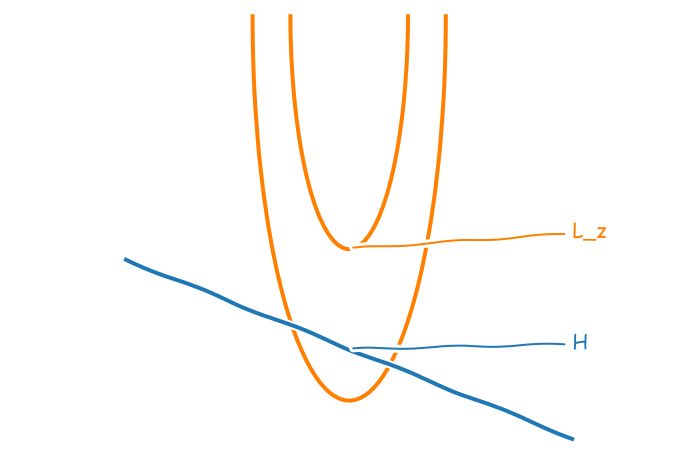

In [230]:
y = np.linspace(-1,1,100)
z = np.linspace(-2,0,50)

[yy,zz] = np.meshgrid(y,z)

with plt.xkcd():
    plt.contour(yy, zz, np.exp(-((yy/0.25)**2 + zz**2)), 
                levels=[0.05,0.33], colors=[coloram])
    plt.plot(y, -1.5 - 0.4*y, color=colorbot)
    plt.xlim([-1.5, 1.5])
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.box(None)
    plt.annotate('L_z', xy=[0,-1.05], xytext=[1,-1],
                 arrowprops=dict(arrowstyle='-',color=coloram), 
                 size=10, color=coloram)
    plt.annotate('H', xy=[0,-1.5], xytext=[1,-1.5],
                 arrowprops=dict(arrowstyle='-', color=colorbot), 
                 size=10, color=colorbot)
    
plt.savefig('images/slope-cut-eddy.png', bbox_inches='tight');

(50, 100)